In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(12,8)})

In [446]:
train_data = pd.read_excel('Airline Prediction/Data_Train.xlsx')

In [447]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [448]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [449]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [450]:
train_data.shape

(10683, 11)

In [451]:
# We have only 1 null value in some of the columns, we can safely drop them

train_data.dropna(inplace=True)

In [452]:
train_data.shape

(10682, 11)

### Data Analysis

In [453]:
# We have a lot of columns which are of string type and we will explore them 

train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [454]:
# Date_of_Journey is the date when the airplane is scheduled to take off
# extracting day and month from the Date_of_Journey column and then removing the column

train_data['Journey_day'] = pd.to_datetime(train_data['Date_of_Journey'], format="%d/%m/%Y").dt.day

train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'], format="%d/%m/%Y").dt.month

In [455]:
train_data.drop('Date_of_Journey', axis=1, inplace=True)

In [456]:
# Dep_Time is when the airplane departs the airport to fly to the destination
# similarly for Dep_Time column, extract hours and mins and then drop the column

train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour

train_data['Dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute

In [457]:
train_data.drop('Dep_Time', axis=1, inplace=True)

In [458]:
# Arrival_Time is when the airplane arrives at the destination airport
# Extract hour and mins from the arrival and then drop the column
    
train_data['Arrival_hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour

train_data['Arrival_min'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute

In [459]:
train_data.drop('Arrival_Time', axis=1, inplace=True)

In [460]:
# Duration is the total time taken for the journey
# The values in Duration are in hours and minutes but in string format. 
# Extract Hours and Mins from Duration column

duration_list = list(train_data['Duration'])

for i in range(len(duration_list)):
    if len(duration_list[i].split()) != 2:
        if 'h' in duration_list[i]:
            duration_list[i] = duration_list[i].strip() + ' 0m'
        else:
            duration_list[i] = '0h ' + duration_list[i]
            
duration_hours = []
duration_mins = []

for i in range(len(duration_list)):
    duration_hours.append(int(duration_list[i].split(sep='h')[0]))
    duration_mins.append(int(duration_list[i].split(sep = "m")[0].split()[-1]))

    
train_data['Duration_hours'] = duration_hours
train_data['Duration_mins'] = duration_mins

In [461]:
train_data.drop('Duration', axis=1, inplace=True)

### Categorical Variables

1. **Nominal categorical variables** = do not have any specific order


2. **Ordinal categorical variables** = have a particular order

In [231]:
# Checking the remaining variables

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   Journey_day      10682 non-null  int64 
 8   Journey_month    10682 non-null  int64 
 9   Dep_hour         10682 non-null  int64 
 10  Dep_min          10682 non-null  int64 
 11  Arrival_hour     10682 non-null  int64 
 12  Arrival_min      10682 non-null  int64 
 13  Duration_hours   10682 non-null  int64 
 14  Duration_mins    10682 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.3+ MB


In [464]:
# Explore Airline, Source, Destination, Route, Total_stops, Additional_Info

# plot all the value counts from these column against Price to see the prices for each value

In [465]:
# AIRLINE COLUMN

train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

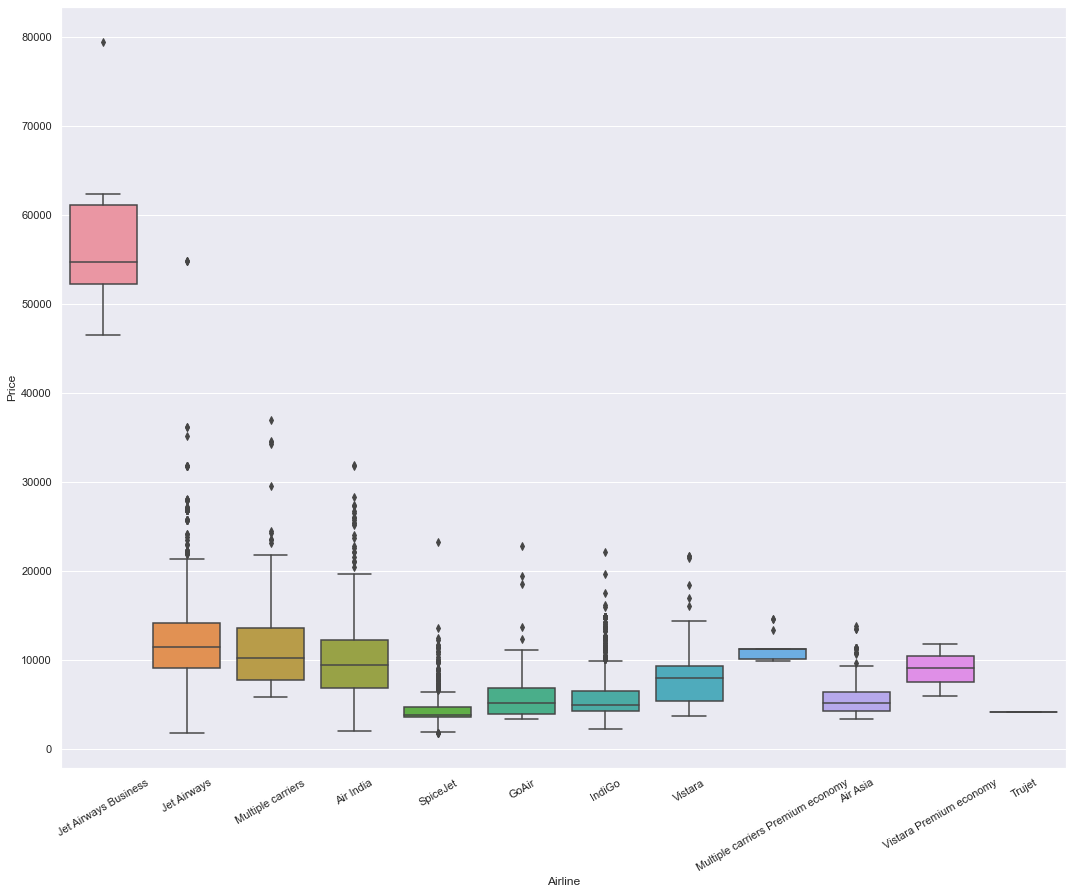

In [466]:
plt.figure(figsize=(18,14))
sns.boxplot(x='Airline', y='Price', data=train_data.sort_values('Price', ascending=False))
plt.xticks(rotation = 30)
plt.show()

In [467]:
# Apply one hot encoding to Airline Column and drop the first one

Airline = pd.get_dummies(train_data[['Airline']], drop_first=True)

In [468]:
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [469]:
# SOURCE COLUMN

train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

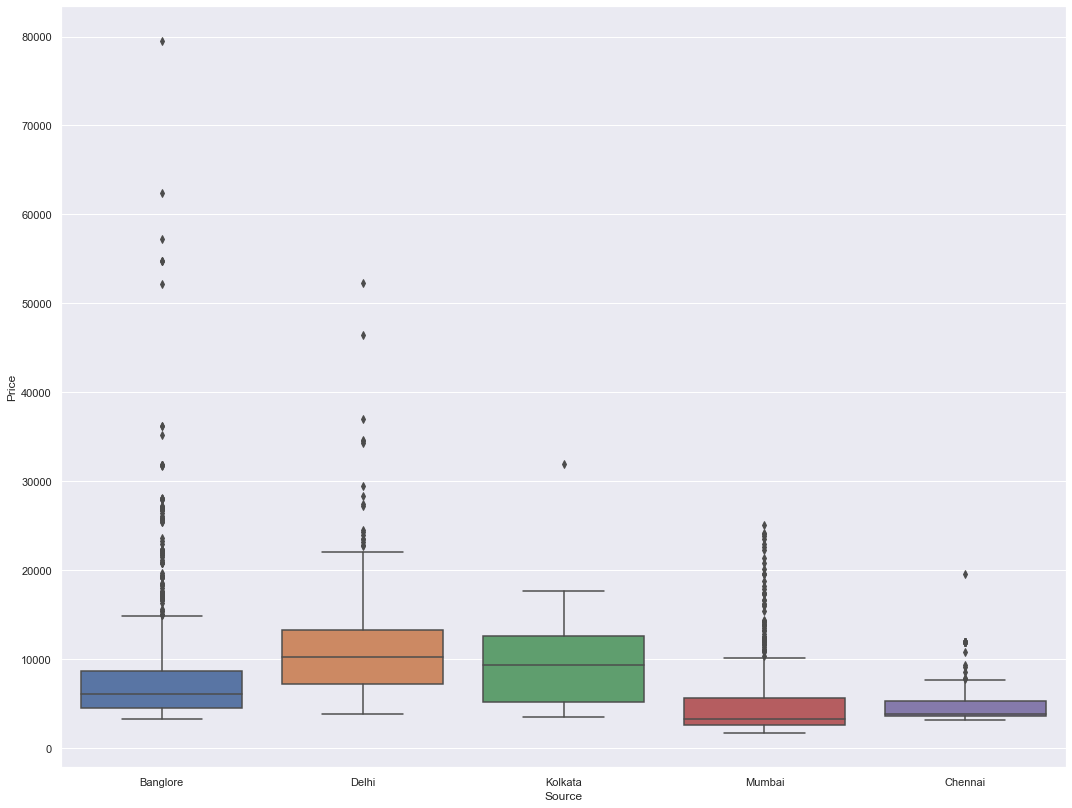

In [470]:
plt.figure(figsize=(18,14))
sns.boxplot(x='Source', y='Price', data=train_data.sort_values('Price', ascending=False))
plt.show()

In [471]:
# Since it is nominal categorical variable, lets use one hot encoding

Source = pd.get_dummies(train_data[['Source']], drop_first=True)

In [472]:
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [473]:
# Similarly for Destination column

train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

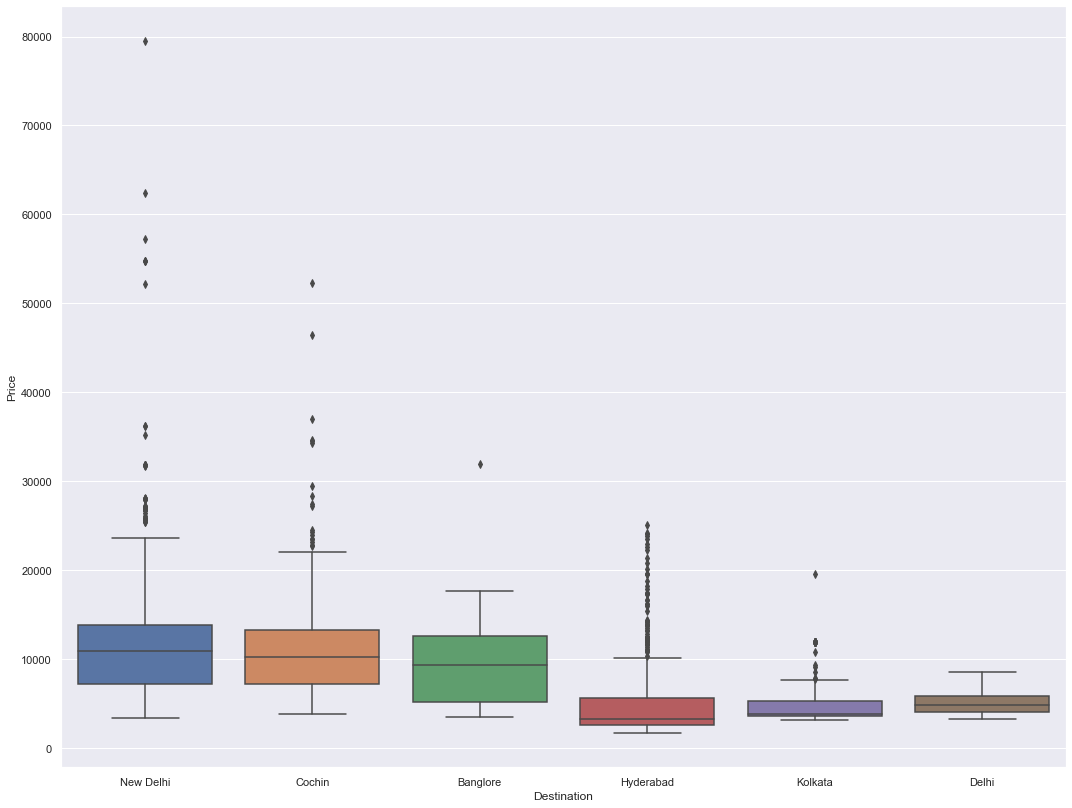

In [474]:
plt.figure(figsize=(18,14))
sns.boxplot(x='Destination', y='Price', data=train_data.sort_values('Price', ascending=False))
plt.show()

In [475]:
Destination = pd.get_dummies(train_data[['Destination']], drop_first=True)

In [476]:
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [477]:
# Ordinal Categorical feature
# Using LabelEncoder here

train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

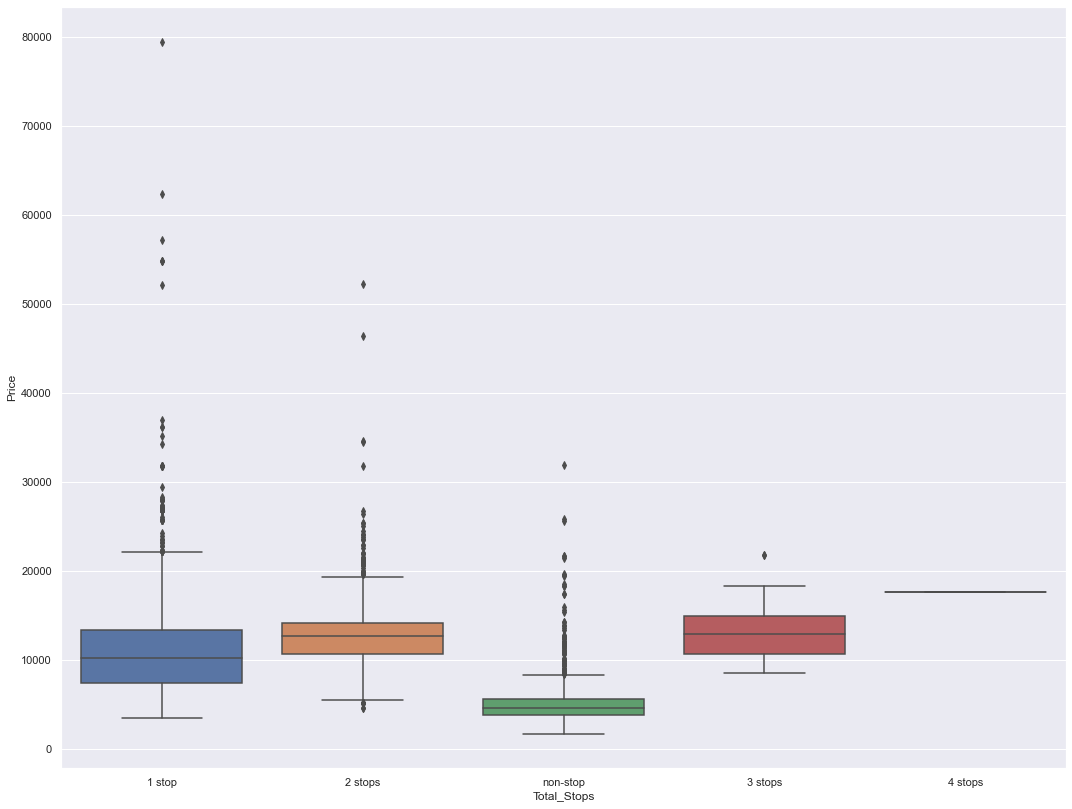

In [478]:
plt.figure(figsize=(18,14))
sns.boxplot(x='Total_Stops', y='Price', data=train_data.sort_values('Price', ascending=False))
plt.show()

In [479]:
ord_dict = {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3 , '4 stops': 4}
train_data['Total_Stops'].replace(ord_dict, inplace=True)

In [480]:
data = pd.concat([train_data, Airline, Source, Destination], axis=1)

In [483]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [484]:
# We have random values under R0ute and they are not unique as well, neither categorical. So delete this
data['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [485]:
# Similarly for Additional_Info column as well. So we will delete this
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [486]:
# Drop the columns that we no longer need

data.drop(['Airline', 'Source', 'Destination', 'Additional_Info', 'Route'], axis=1, inplace=True)

In [487]:
data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1




Now all the columns are of numberical type and thus will be helpful to make our model more efficient

In [488]:
data.shape

(10682, 30)

### Similar PreProcessing for our Test Data

In [489]:
test_data = pd.read_excel('Airline Prediction/Test_set.xlsx')

In [490]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [491]:
test_data.shape

(2671, 10)

In [492]:
# Combining all the steps we performed above, on Test Data set

print('Test Data set info')
print('-'*50)
test_data.info()

print('\n\nNull values in Test data set')
print('-'*50)
print(test_data.isnull().sum())

# Start From here

test_data['Journey_day'] = pd.to_datetime(test_data['Date_of_Journey'], format="%d/%m/%Y").dt.day
test_data['Journey_month'] = pd.to_datetime(test_data['Date_of_Journey'], format="%d/%m/%Y").dt.month
test_data.drop('Date_of_Journey', axis=1, inplace=True)

test_data['Dep_hour'] = pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_min'] = pd.to_datetime(test_data['Dep_Time']).dt.minute
test_data.drop('Dep_Time', axis=1, inplace=True)

test_data['Arrival_hour'] = pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_min'] = pd.to_datetime(test_data['Arrival_Time']).dt.minute
test_data.drop('Arrival_Time', axis=1, inplace=True)


duration_list = list(test_data['Duration'])

for i in range(len(duration_list)):
    if len(duration_list[i].split()) != 2:
        if 'h' in duration_list[i]:
            duration_list[i] = duration_list[i].strip() + ' 0m'
        else:
            duration_list[i] = '0h ' + duration_list[i]
            
duration_hours = []
duration_mins = []

for i in range(len(duration_list)):
    duration_hours.append(int(duration_list[i].split(sep='h')[0]))
    duration_mins.append(int(duration_list[i].split(sep = "m")[0].split()[-1]))

test_data['Duration_hours'] = duration_hours
test_data['Duration_mins'] = duration_mins
test_data.drop('Duration', axis=1, inplace=True)

print('\n\nValues in Airlines')
print('-'*50)
print(test_data['Airline'].value_counts())

print('\n\nValues in Source')
print('-'*50)
print(test_data['Source'].value_counts())

print('\n\nValues in Destination')
print('-'*50)
print(test_data['Destination'].value_counts())

Airline = pd.get_dummies(test_data[['Airline']], drop_first=True)
Source = pd.get_dummies(test_data[['Source']], drop_first=True)
Destination = pd.get_dummies(test_data[['Destination']], drop_first=True)


ord_dict = {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3 , '4 stops': 4}
test_data['Total_Stops'].replace(ord_dict, inplace=True)
test_data = pd.concat([test_data, Airline, Source, Destination], axis=1)

test_data.drop(['Airline', 'Source', 'Destination', 'Additional_Info', 'Route'], axis=1, inplace=True)

Test Data set info
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


Null values in Test data set
--------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration   

In [493]:
test_data.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [494]:
test_data.shape

(2671, 28)

### Feature Selection

We try to make selection of the best fit variable/features with our dependent variable and only use them to fit in our model. There are many ways in which we can implement Feature Selection

1. Heatmap/Clustermap - it will give a good insight into correlation of each feature with our dependent feature

2. SelectFromModel/ExtraTreeRegressor - to find out relevant features using feature_importance_


In [495]:
data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [496]:
data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [497]:
X = data.loc[:,['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [498]:
X.shape

(10682, 29)

In [499]:
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [500]:
y = data.loc[:,'Price']

In [501]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [502]:
y.shape

(10682,)

<Figure size 1440x1440 with 0 Axes>

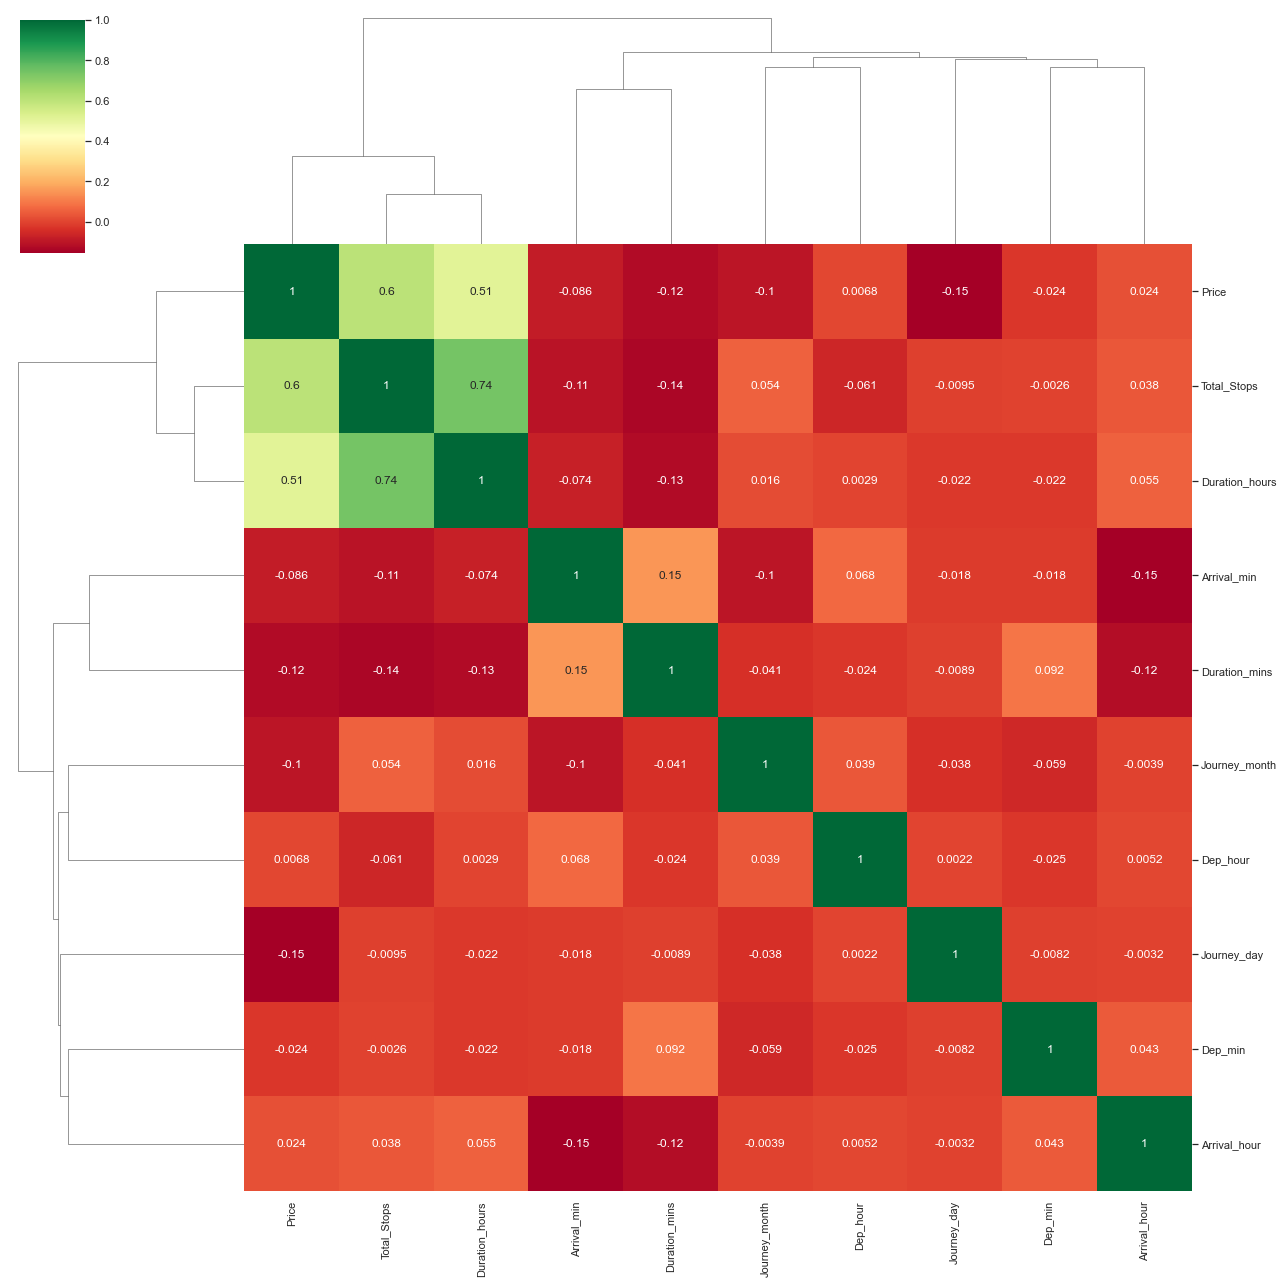

In [508]:
sns.clustermap(train_data.corr(), annot=True, cmap='RdYlGn', figsize=(18,18))

In [510]:
# SelectFromModel to select important features

from sklearn.ensemble import ExtraTreesRegressor
feature_selection = ExtraTreesRegressor()

In [511]:
feature_selection.fit(X,y)

ExtraTreesRegressor()

In [512]:
print(feature_selection.feature_importances_)

[2.45755697e-01 1.44055662e-01 5.34238477e-02 2.36946680e-02
 2.09788333e-02 2.83443989e-02 1.92017069e-02 1.14955579e-01
 1.76551600e-02 9.15284594e-03 1.96469895e-03 1.85217573e-02
 1.34800747e-01 6.68792499e-02 1.95378050e-02 8.59114245e-04
 3.19352060e-03 8.50187356e-05 5.05524025e-03 7.85839865e-05
 4.39546301e-04 8.81082218e-03 3.62949466e-03 6.43903343e-03
 8.30353488e-03 1.32019544e-02 5.57634688e-03 6.14551563e-04
 2.47905817e-02]


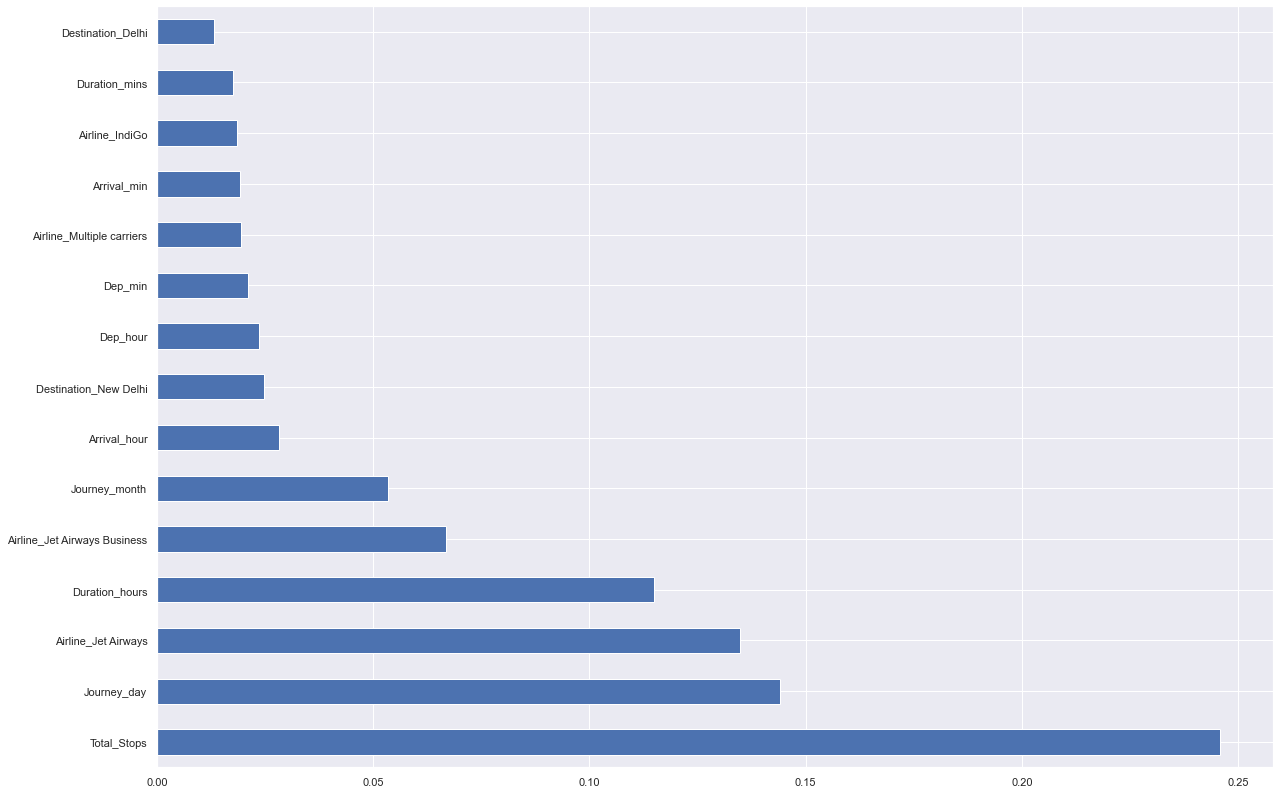

In [520]:
plt.figure(figsize=(20,14))
feat_imp_data = pd.Series(feature_selection.feature_importances_, index=X.columns)
feat_imp_data.nlargest(15).plot(kind='barh')
plt.show()

In [ ]:
# These are the the top 15 features with highest importance values

### Machine Learning Model - RandomForestRegressor

1. Scaling is not done since RandForest is tree based, it does not need scaling
2. Root Mean Square Error is used to evaluate the model performance
3. Rest all the steps are standard

In [524]:
from sklearn.model_selection import train_test_split

In [525]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [522]:
from sklearn.ensemble import RandomForestRegressor

In [527]:
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

RandomForestRegressor()

In [528]:
y_predictions = rf.predict(X_test)

In [529]:
# measuring accuracy

rf.score(X_train, y_train)

0.9529966116993894

In [530]:
rf.score(X_test, y_test)

0.7968073360274599

/Users/akshayshirsat/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


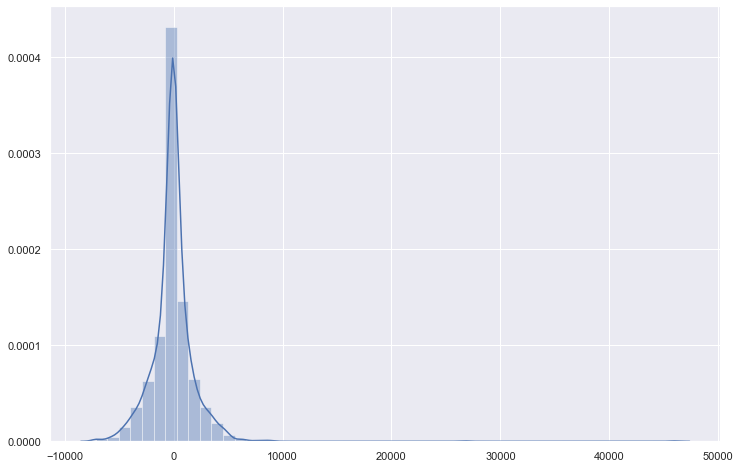

In [536]:
sns.distplot(y_test-y_predictions)
plt.xlabel('')
plt.ylabel('')
plt.show()

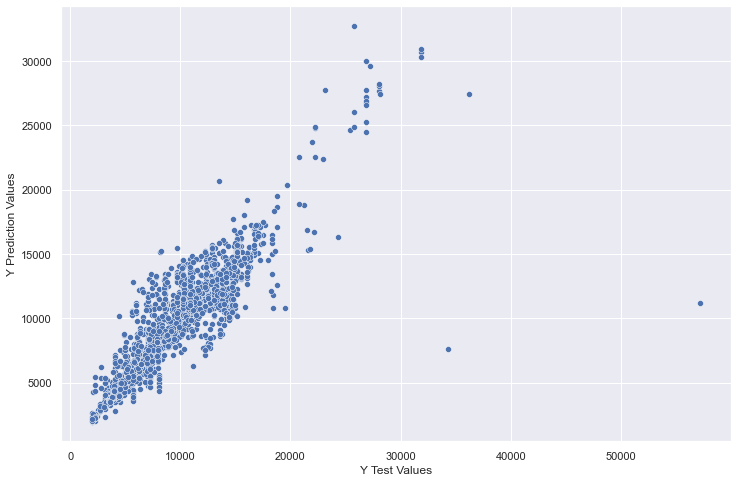

In [535]:
sns.scatterplot(x=y_test, y=y_predictions)
plt.xlabel('Y Test Values')
plt.ylabel('Y Prediction Values')
plt.show()

In [ ]:
# Calculating Root Mean Squared Error and r2_score

In [546]:
from sklearn.metrics import mean_squared_error, r2_score

In [545]:
print('RMSE is: {}'.format(np.sqrt(mean_squared_error(y_test, y_predictions))))

RMSE is: 2093.1439666760593


In [547]:
r2_score(y_test, y_predictions)

0.7968073360274599

### HyperParameterTuning using RandomisedSearchCV

In [548]:
from sklearn.model_selection import RandomizedSearchCV

In [552]:
# setting multiple values for each parameters

n_estimators = [100,200,300,400,500,600,700,800,900,1000] # no: of trees in RandomForestRegressor
max_features = ['auto', 'sqrt'] # no: of features at every split of tree
max_depth = [5,10,15,20,25,30] # no: of depth levels in the tree
min_samples_split = [2, 4, 8, 16, 100] # minimum number of samples for split
min_samples_leaf = [1, 2, 4, 8] # minimum number of samples for each leaf

In [553]:
param_dict = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [561]:
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dict, 
                                   scoring='neg_mean_squared_error', n_iter=10, cv=2, verbose=1, n_jobs=1)

In [562]:
random_search.fit(X_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 4, 8, 16, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   scoring='neg_mean_squared_error', verbose=1)

In [563]:
random_search.best_params_

{'n_estimators': 800,
 'min_samples_split': 16,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

In [564]:
y_rf_prediction = random_search.predict(X_test)

/Users/akshayshirsat/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


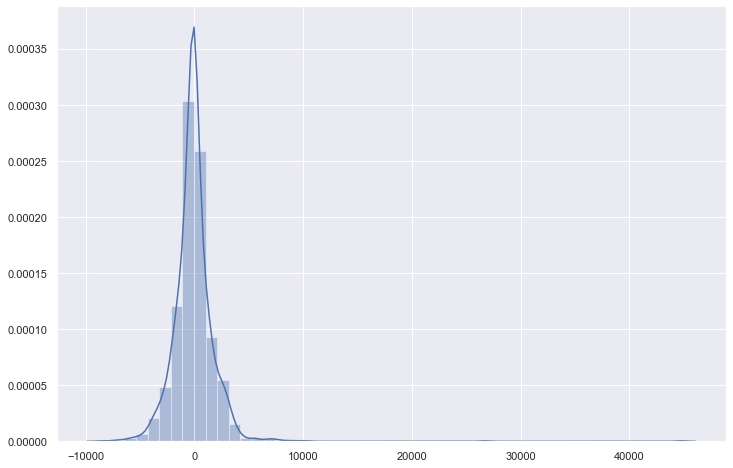

In [565]:
sns.distplot(y_test-y_rf_prediction)
plt.xlabel('')
plt.ylabel('')
plt.show()

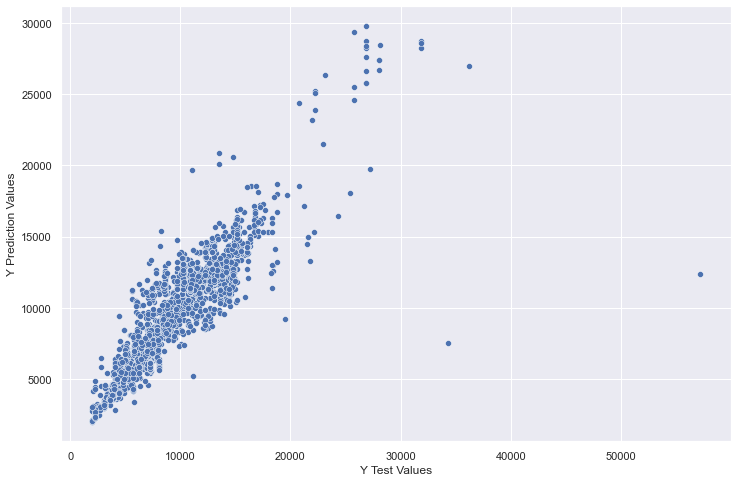

In [566]:
sns.scatterplot(x=y_test, y=y_rf_prediction)
plt.xlabel('Y Test Values')
plt.ylabel('Y Prediction Values')
plt.show()

In [567]:
print('RMSE is: {}'.format(np.sqrt(mean_squared_error(y_test, y_rf_prediction))))

RMSE is: 2014.197982983406


In [568]:
r2_score(y_test, y_rf_prediction)

0.8118457046182428

### Generating a Pickle file to save the model

In [569]:
import pickle

In [577]:
file = open('Airline_Prediction/random_forest_regressor.pkl', 'wb')

pickle.dump(rf, file)

In [578]:
model = open('Airline_Prediction/random_forest_regressor.pkl','rb')
forest = pickle.load(model)

In [579]:
y_prediction = forest.predict(X_test)

In [581]:
r2_score(y_test, y_prediction)

0.7968073360274599